In [1]:
from datageneration import * 
from diffusion_crt import *
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
funcs = {
    "linear": lambda x: x,
    "square": lambda x: x ** 2,
    "cos": lambda x: np.cos(x),
    "exp": lambda x: np.exp(-np.abs(x)) ,
    "tanh": lambda x: np.tanh(x),
}

func_names = ["linear", "square", "cos", "exp", "tanh"]

def tranform(x):
    return np.log(x)-np.log(1-x)

def re_transform(x):
    return 1/(1+np.exp(-x))

def normalize(fX):
    fXn = (fX - fX.min())/(fX.max()-fX.min())
    return fXn

def data_gen_with_function(n_samples, dim, test_type,func_name=["linear","square"], noise="gaussian", seed=None):
    if seed == None:
        np.random.seed()
    else:
        np.random.seed(seed)

    if noise == "gaussian":
        sampler = np.random.normal
    elif noise == "laplace":
        sampler = np.random.laplace
    elif noise == "uniform":
        sampler = np.random.uniform
#     keys = np.random.choice(range(5), 2)
#     pnl_funcs = [func_names[k] for k in keys]

    func1 = funcs[func_name[0]]
    func2 = funcs[func_name[1]]

    x = 0.25 * sampler(size=(n_samples, 1))
    y = 0.25 * sampler(size=(n_samples, 1))
    z = sampler(size=(n_samples, dim))
    m = np.mean(z, axis=1).reshape(-1, 1)
    x += m
    y += m
    x, y = func1(x), func2(y)

    if test_type:
        return x, y, z,
    else:
        eb = 0.5 * sampler(size=(n_samples, 1))
        x += eb
        y += eb
        return x, y, z,

Text(0.5, 1.0, 'linear')

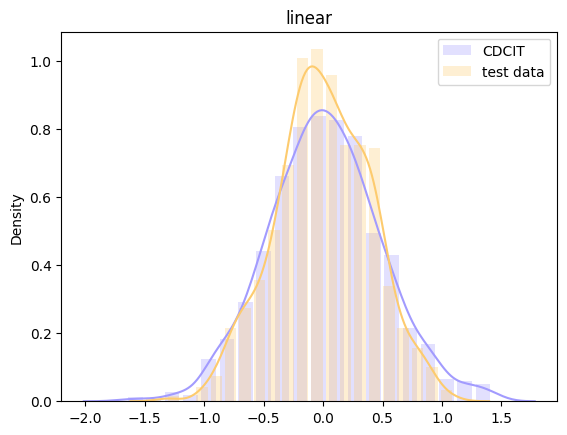

In [3]:
total_x,total_y,total_z,=data_gen_with_function(n_samples=2000, 
                                                dim=10, 
                                                test_type=True,
                                                func_name=["linear","linear"],
                                                noise='gaussian', 
                                                seed=114514)
xxx=total_x[:1000,:]
yyy=total_y[:1000,:]
zzz=total_z[:1000,:]

xxx_crt=total_x[1000:,:]
yyy_crt=total_y[1000:,:]
zzz_crt=total_z[1000:,:]


_,samples=perform_diffusion_crt(xxx, yyy, zzz, xxx_crt, yyy_crt, zzz_crt, 
                            repeat=1, device=torch.device('cuda'), 
                            verbose=False, seed=777, stat='cmi',sampling_model='score',return_samples=True)



sns.distplot((samples.view(-1).detach().cpu().numpy()), 
             hist=True, 
             bins=20, 
             hist_kws={"histtype": "barstacked", "rwidth":0.8, "linewidth": 0.5,"alpha": 0.3}, 
             color = '#a29bfe', label = 'CDCIT')
sns.distplot((xxx).reshape(-1), 
             hist=True, 
             bins=20, 
             hist_kws={"histtype": "barstacked", "rwidth":0.8, "linewidth": 0.5,"alpha": 0.3}, 
             color = '#fdcb6e', label = 'test data')
plt.legend()
plt.title('linear')

Text(0.5, 1.0, 'square')

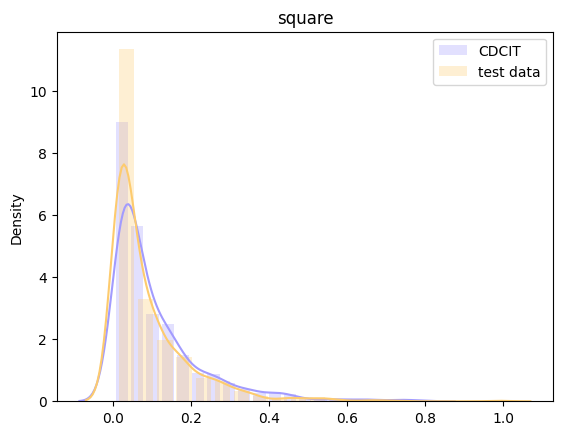

In [4]:
total_x,total_y,total_z,=data_gen_with_function(n_samples=2000, 
                                                dim=10, 
                                                test_type=True,
                                                func_name=["square","square"],
                                                noise='gaussian', 
                                                seed=114)
xxx=total_x[:1000,:]
yyy=total_y[:1000,:]
zzz=total_z[:1000,:]

xxx_crt=total_x[1000:,:]
yyy_crt=total_y[1000:,:]
zzz_crt=total_z[1000:,:]
# the square function has constrain (the generated samples have to >=0), so use this transform
xxx = tranform((normalize(xxx)+0.01)/1.02)
yyy = tranform((normalize(yyy)+0.01)/1.02)
zzz = tranform((normalize(zzz)+0.01)/1.02)
xxx_crt = tranform((normalize(xxx_crt)+0.01)/1.02)
yyy_crt = tranform((normalize(yyy_crt)+0.01)/1.02)
zzz_crt = tranform((normalize(zzz_crt)+0.01)/1.02)


_,samples=perform_diffusion_crt(xxx, yyy, zzz, xxx_crt, yyy_crt, zzz_crt, 
                            repeat=1, device=torch.device('cuda'), 
                            verbose=False, seed=777, stat='cmi',sampling_model='ddpm',return_samples=True)


sns.distplot(re_transform(samples.view(-1).detach().cpu().numpy()), 
             hist=True, 
             bins=20, 
             hist_kws={"histtype": "barstacked", "rwidth":0.8, "linewidth": 0.5,"alpha": 0.3}, 
             color = '#a29bfe', label = 'CDCIT')
sns.distplot(re_transform(xxx).reshape(-1), 
             hist=True, 
             bins=20, 
             hist_kws={"histtype": "barstacked", "rwidth":0.8, "linewidth": 0.5,"alpha": 0.3}, 
             color = '#fdcb6e', label = 'test data')
plt.legend()
plt.title('square')

Text(0.5, 1.0, 'cos')

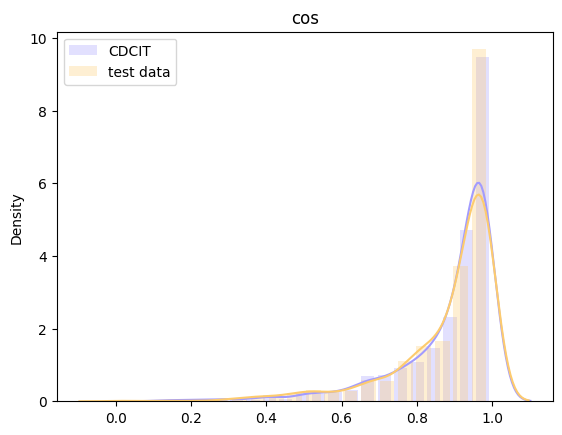

In [5]:
total_x,total_y,total_z,=data_gen_with_function(n_samples=2000, 
                                                dim=10, 
                                                test_type=True,
                                                func_name=["cos","cos"],
                                                noise='gaussian', 
                                                seed=514)
xxx=total_x[:1000,:]
yyy=total_y[:1000,:]
zzz=total_z[:1000,:]

xxx_crt=total_x[1000:,:]
yyy_crt=total_y[1000:,:]
zzz_crt=total_z[1000:,:]
# the cos function has constrain (the generated samples have to >=0 and <=1), so use this transform

xxx = tranform((normalize(xxx)+0.01)/1.02)
yyy = tranform((normalize(yyy)+0.01)/1.02)
zzz = tranform((normalize(zzz)+0.01)/1.02)
xxx_crt = tranform((normalize(xxx_crt)+0.01)/1.02)
yyy_crt = tranform((normalize(yyy_crt)+0.01)/1.02)
zzz_crt = tranform((normalize(zzz_crt)+0.01)/1.02)


_,samples=perform_diffusion_crt(xxx, yyy, zzz, xxx_crt, yyy_crt, zzz_crt, 
                            repeat=1, device=torch.device('cuda'), 
                            verbose=False, seed=777, stat='cmi',sampling_model='ddpm',return_samples=True)


sns.distplot(re_transform(samples.view(-1).detach().cpu().numpy()), 
             hist=True, 
             bins=20, 
             hist_kws={"histtype": "barstacked", "rwidth":0.8, "linewidth": 0.5,"alpha": 0.3}, 
             color = '#a29bfe', label = 'CDCIT')
sns.distplot(re_transform(xxx).reshape(-1), 
             hist=True, 
             bins=20, 
             hist_kws={"histtype": "barstacked", "rwidth":0.8, "linewidth": 0.5,"alpha": 0.3}, 
             color = '#fdcb6e', label = 'test data')
plt.legend()
plt.title('cos')

Text(0.5, 1.0, 'tanh')

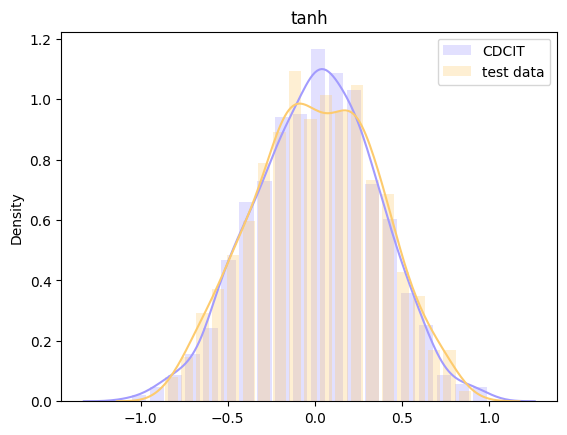

In [6]:
total_x,total_y,total_z,=data_gen_with_function(n_samples=2000, 
                                                dim=10, 
                                                test_type=True,
                                                func_name=["tanh","tanh"],
                                                noise='gaussian', 
                                                seed=1919)
xxx=total_x[:1000,:]
yyy=total_y[:1000,:]
zzz=total_z[:1000,:]

xxx_crt=total_x[1000:,:]
yyy_crt=total_y[1000:,:]
zzz_crt=total_z[1000:,:]


_,samples=perform_diffusion_crt(xxx, yyy, zzz, xxx_crt, yyy_crt, zzz_crt, 
                            repeat=1, device=torch.device('cuda'), 
                            verbose=False, seed=777, stat='cmi',sampling_model='ddpm',return_samples=True)


sns.distplot((samples.view(-1).detach().cpu().numpy()), 
             hist=True, 
             bins=20, 
             hist_kws={"histtype": "barstacked", "rwidth":0.8, "linewidth": 0.5,"alpha": 0.3}, 
             color = '#a29bfe', label = 'CDCIT')
sns.distplot((xxx).reshape(-1), 
             hist=True, 
             bins=20, 
             hist_kws={"histtype": "barstacked", "rwidth":0.8, "linewidth": 0.5,"alpha": 0.3}, 
             color = '#fdcb6e', label = 'test data')
plt.legend()
plt.title('tanh')

Text(0.5, 1.0, 'exp')

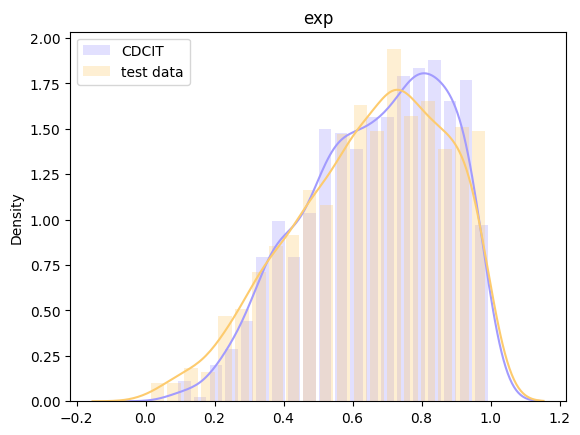

In [7]:
total_x,total_y,total_z,=data_gen_with_function(n_samples=2000, 
                                                dim=10, 
                                                test_type=True,
                                                func_name=["exp","exp"],
                                                noise='gaussian', 
                                                seed=810)
xxx=total_x[:1000,:]
yyy=total_y[:1000,:]
zzz=total_z[:1000,:]

xxx_crt=total_x[1000:,:]
yyy_crt=total_y[1000:,:]
zzz_crt=total_z[1000:,:]

xxx = tranform((normalize(xxx)+0.01)/1.02)
yyy = tranform((normalize(yyy)+0.01)/1.02)
zzz = tranform((normalize(zzz)+0.01)/1.02)
xxx_crt = tranform((normalize(xxx_crt)+0.01)/1.02)
yyy_crt = tranform((normalize(yyy_crt)+0.01)/1.02)
zzz_crt = tranform((normalize(zzz_crt)+0.01)/1.02)


_,samples=perform_diffusion_crt(xxx, yyy, zzz, xxx_crt, yyy_crt, zzz_crt, 
                            repeat=1, device=torch.device('cuda'), 
                            verbose=False, seed=777, stat='cmi',sampling_model='ddpm',return_samples=True)
sns.distplot(re_transform(samples.view(-1).detach().cpu().numpy()), 
             hist=True, 
             bins=20, 
             hist_kws={"histtype": "barstacked", "rwidth":0.8, "linewidth": 0.5,"alpha": 0.3}, 
             color = '#a29bfe', label = 'CDCIT')
sns.distplot(re_transform(xxx).reshape(-1), 
             hist=True, 
             bins=20, 
             hist_kws={"histtype": "barstacked", "rwidth":0.8, "linewidth": 0.5,"alpha": 0.3}, 
             color = '#fdcb6e', label = 'test data')
plt.legend()
plt.title('exp')